# Import Libraries

In [9]:
!pip install transformers
!pip install lxml
!pip install nlpaug
from imblearn.over_sampling import SMOTE
import requests
from bs4 import BeautifulSoup
import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from lxml import etree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nlpaug.augmenter.word as naw
from sklearn.metrics import confusion_matrix

# EDA

In [10]:
# Load the dataset
df = pd.read_csv("elden_ring_steam_reviews.csv")

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              9794 non-null   int64 
 1   language                        9794 non-null   object
 2   review                          9765 non-null   object
 3   created                         9794 non-null   object
 4   voted_up                        9794 non-null   bool  
 5   votes_up                        9794 non-null   int64 
 6   comment_count                   9794 non-null   int64 
 7   steam_purchase                  9794 non-null   bool  
 8   recieved_for_free               9794 non-null   bool  
 9   written_during_early_access     9794 non-null   bool  
 10  author_num_games_owned          9794 non-null   int64 
 11  author_num_reviews              9794 non-null   int64 
 12  author_playtime_forever         9794 non-null   

In [12]:
print(df.head())

          id language                                             review  \
0  134238864  english            being killed over and over again is fun   
1  134238208  english  I write this review as I have 100% completed E...   
2  134238033  english                                                Fun   
3  134237508  english                                       pretty cool.   
4  134236511  english                                AMAZINGGGGGGGGGGGGG   

               created  voted_up  votes_up  comment_count  steam_purchase  \
0  2023-03-07 14:19:11      True         0              0           False   
1  2023-03-07 14:03:24      True         0              0            True   
2  2023-03-07 13:59:13      True         0              0            True   
3  2023-03-07 13:46:37      True         0              0            True   
4  2023-03-07 13:20:04      True         0              0            True   

   recieved_for_free  written_during_early_access  author_num_games_owned  \
0  

In [13]:
df.describe()

,id,votes_up,comment_count,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review
count,9.794000e+03,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000,9794.000000
mean,1.329966e+08,1.107617,0.035124,109.037268,8.867266,8534.752195,961.129671,7249.124260
std,7.246354e+05,33.576724,0.428238,206.868437,18.287920,9082.240954,1466.911509,8702.430291
min,1.318020e+08,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000,5.000000
25%,1.323394e+08,0.000000,0.000000,23.000000,2.000000,3430.250000,0.000000,2038.000000
50%,1.329959e+08,0.000000,0.000000,56.000000,4.000000,6449.500000,322.000000,5185.000000
75%,1.336450e+08,0.000000,0.000000,123.000000,9.000000,10616.750000,1384.750000,9180.750000
max,1.342389e+08,2410.000000,25.000000,6458.000000,790.000000,160118.000000,20082.000000,160118.000000


In [14]:
df.corrwith(df.voted_up)

<ipython-input-14-29c9c398a76a>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.voted_up)


id                                0.011575
voted_up                          1.000000
votes_up                         -0.017560
comment_count                    -0.125141
steam_purchase                    0.059562
recieved_for_free                -0.001306
written_during_early_access            NaN
author_num_games_owned           -0.041253
author_num_reviews               -0.055828
author_playtime_forever           0.074437
author_playtime_last_two_weeks    0.048198
author_playtime_at_review         0.065102
dtype: float64

In [15]:

# # Calculate the count of each class in the 'voted_up' column
# class_counts = df['voted_up'].value_counts()

In [16]:
#@title
# # Plot a bar graph
# plt.bar(class_counts.index, class_counts.values)

# # Add labels and title to the plot
# plt.xlabel('voted_up')
# plt.ylabel('Count')
# plt.title('Distribution of voted_up')

# # Add value annotations above each bar
# for i, v in enumerate(class_counts.values):
#     plt.text(i, v + 10, str(v), ha='center')

# # Show the plot
# plt.show()

Number of Positive Reviews:  9201
Number of Negative Reviews:  593
----------------------------------------------------------------------------


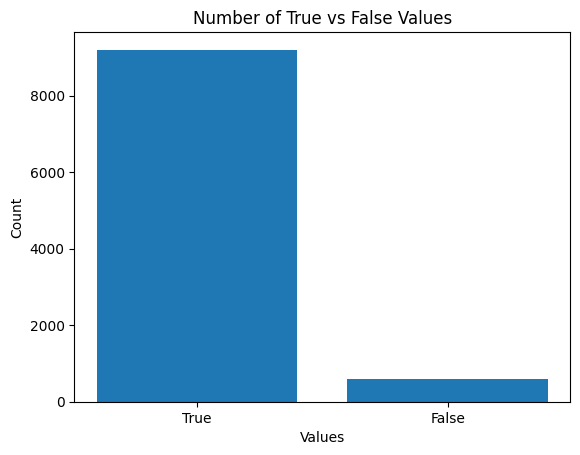

In [17]:
# Count the number of true and false values
true_count = df[df["voted_up"] == True].shape[0]
false_count = df[df["voted_up"] == False].shape[0]

print("Number of Positive Reviews: ", true_count)
print("Number of Negative Reviews: ", false_count)

print("----------------------------------------------------------------------------")

# Create a bar plot
plt.bar(["True", "False"], [true_count, false_count])

# Set plot title and axis labels
plt.title("Number of True vs False Values")
plt.xlabel("Values")
plt.ylabel("Count")

# Show the plot
plt.show()

In [18]:
# Make a copy of the DataFrame
df_corr = df.copy()

# Drop the "voted_up" column from the copy
df_corr = df_corr.drop("voted_up", axis=1)

# Filter out non-numeric columns
numeric_columns = df_corr.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation with "voted_up" column for numeric columns only
correlation = df_corr[numeric_columns].apply(lambda x: x.corr(df['voted_up']))

# Sort correlation values in descending order
correlation = correlation.sort_values(ascending=False)

# Print the correlation results
print(correlation)

author_playtime_forever           0.074437
author_playtime_at_review         0.065102
author_playtime_last_two_weeks    0.048198
id                                0.011575
votes_up                         -0.017560
author_num_games_owned           -0.041253
author_num_reviews               -0.055828
comment_count                    -0.125141
dtype: float64


The more the number of games a person owns the review given by the person for the game dips. It shows that a person becomes more critical about games when he/she plays more games.    

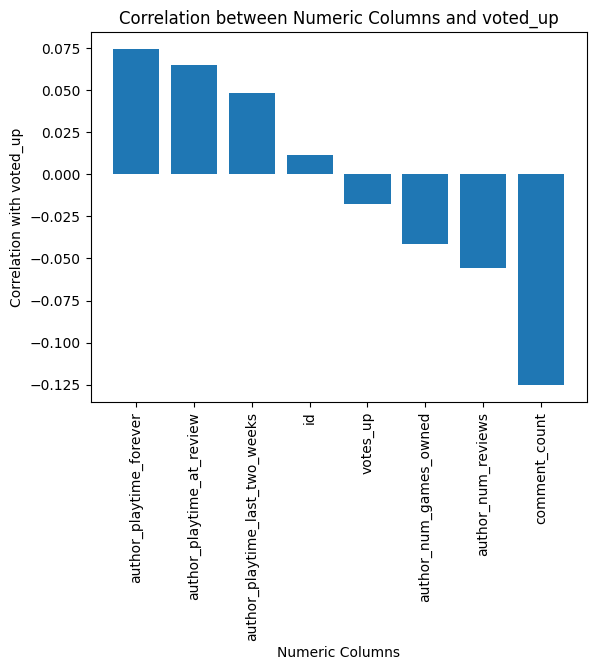

In [19]:
# Plot the correlation values
plt.bar(correlation.index, correlation.values)

# Add labels and title to the plot
plt.xlabel('Numeric Columns')
plt.ylabel('Correlation with voted_up')
plt.title('Correlation between Numeric Columns and voted_up')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Pre-processing

In [20]:
# Convert the "review" column to strings
df["review"] = df["review"].astype(str)

In [21]:
# Remove unnecessary columns
df = df.drop(columns=["id", "created", "votes_up", "language","comment_count", "steam_purchase",
                      "recieved_for_free", "written_during_early_access", "author_num_games_owned",
                      "author_num_reviews", "author_playtime_forever", "author_playtime_last_two_weeks",
                      "author_last_played", "author_playtime_at_review"])
df

,review,voted_up
0,being killed over and over again is fun,True
1,I write this review as I have 100% completed E...,True
2,Fun,True
3,pretty cool.,True
4,AMAZINGGGGGGGGGGGGG,True
...,...,...
9789,Best platformer of the year.,True
9790,"truly fun...very recommended, worth the money ...",True
9791,mimic is the friend we made along the way,True
9792,"The lands of Elden Ring are vast and wild, fil...",True


In [22]:
# Convert 'voted_up' column to boolean. EDIT: No need, already in boolean
# df['voted_up'] = df['voted_up'].map(lambda x: True if x == 'TRUE' else False)

# Split the data into features (reviews) and labels (voted_up)
reviews = df['review'].values
labels = df['voted_up'].values

In [23]:
#@title
# labels

In [24]:
#@title
# get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]

In [25]:
#@title
# get_indexes(True,labels)

In [26]:
# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    reviews, labels, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
train_reviews, val_reviews, train_labels, val_labels = train_test_split(
    train_reviews, train_labels, test_size=0.2, random_state=42)

In [27]:
train_reviews

array(['graet game.', 'yes',
       'Step into the lands between if you like open world games that do not hold your hand. In fact, this game goes out of the way to make you doubt every character and set piece. They will both kill you, if given a chance, with no mercy nor hesitation.',
       ..., "no don't fell like writing so its good", 'nigga',
       'Boulder\n\\'], dtype=object)

In [28]:
train_labels

array([ True,  True,  True, ...,  True, False,  True])

In [29]:
test_reviews

array(['good', 'Better than God Of War',
       'The game is incredible for players that are new to souls games.  It is difficult enough where you have to think about what to do and where you want to go, but difficult enough to the point where you would want to pull your hair out. (Most of the Time).  Very good game that I would recommend for newer players and older players alike.',
       ..., 'this game forces you to be good, i like that', 'its alright',
       "What an amazing game. Easily top 5 of all time in my opinion. I believe I did everything there is to do and obtained every item that I had interest in getting. All I can say is it's a masterpiece worth pushing through the struggle for. \n\nAbsolutely beautiful scenery, fluid gameplay and plenty of build options for your character. \n\nNow to play it a second time with a friend!"],
      dtype=object)

In [30]:
test_labels

array([ True,  True,  True, ...,  True,  True,  True])

In [31]:
val_reviews

array(['fun af. good physics.',
       "I was very happy that elden ring won goty 2022, but now I want all games from software to lose, even if the game is good, it's abusive what they did with the price of other games, it's even worth reporting it yes, games from years ago...",
       'Its fun. Its nothing like Terraria.', ...,
       '"yes" from souls veteran.', 'yuh', 'Feet'], dtype=object)

In [32]:
val_labels

array([ True, False,  True, ...,  True,  True,  True])

# Sentiment Analysis

## Tokenization

In [33]:
# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the training reviews
train_encodings = tokenizer.batch_encode_plus(
    train_reviews.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512,
    return_attention_mask=True,
    return_tensors='tf'
)

# Tokenize the validation reviews
val_encodings = tokenizer.batch_encode_plus(
    val_reviews.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512,
    return_attention_mask=True,
    return_tensors='tf'
)

# Tokenize the testing reviews
test_encodings = tokenizer.batch_encode_plus(
    test_reviews.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512,
    return_attention_mask=True,
    return_tensors='tf'
)


In [34]:
# Create TensorFlow datasets from the tokenized data
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    val_labels
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    },
    test_labels
))


# DistilBERT Model fitting



In [35]:
# Load the pre-trained DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Compile the model. We can tweak the hyperparameters later
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# Train the model
history = model.fit(
    train_dataset.shuffle(100).batch(16),
    epochs=3,
    batch_size=16,
    validation_data=val_dataset.shuffle(100).batch(16),
    verbose=1
)

Epoch 1/3


# Evaluation

In [ ]:
from sklearn.metrics import f1_score

# Evaluate the model on the test dataset
results = model.evaluate(test_dataset.batch(16), verbose=0)
accuracy = results[1]

# Get accuracy and F1 score
predictions = model.predict(test_dataset.batch(16)).logits.argmax(axis=-1)
f1 = f1_score(test_labels, predictions)

print('Accuracy:', accuracy)
print('F1 score:', f1)

In [ ]:
#Classification metrics
from sklearn.metrics import classification_report

metrics = classification_report(test_labels, predictions)

In [ ]:
print(metrics)

# Balancing the minority class

In [ ]:
df.to_csv('df.csv',index=False)

In [ ]:
# Balance the minority class using data augmentation
augmenter = naw.SynonymAug(aug_src='wordnet')
minority_class = df[df['voted_up'] == False]
augmented_reviews = []
for index, row in minority_class.iterrows():
  review = str(row['review'])  # Convert to string
  augmented_reviews.extend(augmenter.augment(row['review'], n=1))

In [ ]:
augmented_reviews

In [ ]:
augmented_data = pd.DataFrame({
    'review': augmented_reviews,
    'voted_up': [False] * len(augmented_reviews)
})

In [ ]:
augmented_data['review']

In [ ]:
balanced_data = pd.concat([df, augmented_data], ignore_index=True)

In [ ]:
balanced_data['review']

In [ ]:
# Split the data into features (reviews) and labels (voted_up)
reviews_bal = balanced_data['review'].values
labels_bal = balanced_data['voted_up'].values

In [ ]:
reviews_bal

In [ ]:
# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    reviews_bal, labels_bal, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
train_reviews, val_reviews, train_labels, val_labels = train_test_split(
    train_reviews, train_labels, test_size=0.2, random_state=42)

In [ ]:
# Load the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the training reviews
train_encodings = tokenizer.batch_encode_plus(
    train_reviews.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512,
    return_attention_mask=True,
    return_tensors='tf'
)

# Tokenize the validation reviews
val_encodings = tokenizer.batch_encode_plus(
    val_reviews.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512,
    return_attention_mask=True,
    return_tensors='tf'
)

# Tokenize the testing reviews
test_encodings = tokenizer.batch_encode_plus(
    test_reviews.tolist(),
    truncation=True,
    padding=True,
    return_token_type_ids=False,
    max_length=512,
    return_attention_mask=True,
    return_tensors='tf'
)


In [ ]:
# Create TensorFlow datasets from the tokenized data
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    val_labels
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    },
    test_labels
))


In [ ]:
# Load the pre-trained DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Compile the model. We can tweak the hyperparameters later
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
)


In [ ]:
# Train the model
history = model.fit(
    train_dataset.shuffle(100).batch(16),
    epochs=3,
    batch_size=16,
    validation_data=val_dataset.shuffle(100).batch(16),
    verbose=1
)

# Evaluation

In [ ]:
from sklearn.metrics import f1_score

# Evaluate the model on the test dataset
results = model.evaluate(test_dataset.batch(16), verbose=0)
accuracy = results[1]

# Get accuracy and F1 score
predictions = model.predict(test_dataset.batch(16)).logits.argmax(axis=-1)
f1 = f1_score(test_labels, predictions)

print('Accuracy:', accuracy)
print('F1 score:', f1)

In [ ]:
#Classification metrics
from sklearn.metrics import classification_report

metrics = classification_report(test_labels, predictions)

In [ ]:
print(metrics)

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot a bar plot to visualize the distribution of predicted labels
predicted_counts = pd.Series(predictions).value_counts()
plt.figure(figsize=(6, 4))
# sns.barplot(predicted_counts.index, predicted_counts.values)
plt.title("Distribution of Predicted Labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.show()